In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as imat
import numpy as np
from tqdm import tqdm

In [7]:
# """
# no. of layer = h          = [3]
# hidden layer size = (h,1) = [3, 4, 2]
# shape X =                 = [2, 177]
# """

In [8]:
"""
Activation Functions
"""

def sigmoid(z):
    return 1 / (1 + (np.exp(-z)))
def ReLU(z):
    return np.maximum(0,z)
def Leaky_ReLU(z,leak):
    return np.maximum(leak,z)

In [9]:
#final virsion without b_p bug
class N_Net():
    
    def __init__(self, x, y, n_h, n_u):
        self.x = x
        self.y = y
        self.n_h = n_h
        self.n_u = n_u

    def define_parameters(self):
        x = self.x
        n_h = self.n_h
        n_u = self.n_u
        
        i_l = np.shape(x)[0]   # n = features
        w, b= [], []
        for i in range(n_h):
            w.append((np.random.randn(n_u[i], i_l) * 0.01).tolist())
            i_l = n_u[i]
            b.append((np.zeros((n_u[i],1))).tolist())
        return w, b
    
    def forward_prapogation(self,x ,w, b):
        z, a = [], []
    #loop
        for i in range(len(w)):
            if i == 0:
                z.append(np.dot(w[i], x) + b[i])
                a.append(sigmoid(z[i]))
            else:
                z.append(np.dot(w[i], z[i-1]) + b[i])
                a.append(sigmoid(z[i]))
        return z, a
    
    def backward_propogation(self, z, a, w):
        dz, dw, db = [], [], []
        x, y = self.x, self.y
        
        #loop
        for i in range(len(w)):
            if i == 0:
                if np.shape(a[-1]) != np.shape(y):
                    print("check your 'y' !!!!")
                    break
                dz.append(a[i-1] - y)
                dw.append(np.dot(dz[i] , np.array(a[i-2]).T))
                db.append(np.sum(dz[i], axis=1,  keepdims=True))
                
            elif i == len(w)-1:
                dz.append(np.dot(np.array(w[-i]).T , dz[i-1])) #, (1 - np.power(a[i-1],2))
                dw.append(np.dot(dz[i], x.T))
                db.append(np.sum(dz[i], axis=1,  keepdims=True))
                
            else:
                dz.append(np.dot(np.array(w[-i]).T , dz[i-1]))   #, (1 - np.power(a[i-1],2))
                dw.append(np.dot(dz[i], np.array(a[-i-2]).T))
                db.append(np.sum(dz[i], axis=1,  keepdims=True))
                
        return np.flip(dw), np.flip(db), np.flip(dz)
    
    def model(self, itteration = 1000, alfa = 0.01):
        x = self.x 
        m = np.shape(x)[1]
        w, b = self.define_parameters()
        
        for i in tqdm(range(itteration)):
            
            z, a = self.forward_prapogation(x, w, b)
            dw, db, dz = self.backward_propogation(z, a, w)
            
            dw, db = dw/m, db/m
            
            temp_w = w - (alfa * dw)
            temp_b = b - (alfa * db)
            w, b = temp_w, temp_b
        
        return w, b

In [1]:
number_data = imat.loadmat('ex4data1.mat')

NameError: name 'imat' is not defined

In [51]:
x = number_data['X']
y = number_data['y']

In [52]:
np.shape(y)

(5000, 1)

In [12]:
ob = N_Net(x.T, y.T, 4, [100,50,20,1])
w, b = ob.define_parameters()
z, a = ob.forward_prapogation(x.T, w, b)
dw, db, dz =  ob.backward_propogation(z, a, w)
w, b = ob.model(itteration = 400)

100%|██████████| 400/400 [01:13<00:00,  5.43it/s]


In [15]:
result = ob.forward_prapogation((x[32]).reshape(400,1), w, b)

In [16]:
result[-1][-1]

array([[1.]])

In [59]:
data = pd.read_csv('ex2data2.csv')
data.columns = ['0','x1','x2',"y"]
x = np.array(pd.concat([data['x1'] , data['x2']] , axis = 1))
y = np.array(data['y'])

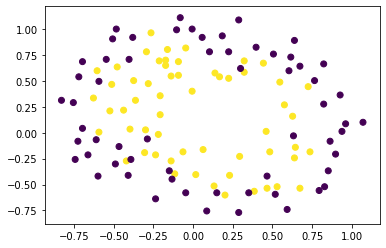

In [56]:
plt.scatter(data['x1'] , data['x2'] , c = data['y'])

In [1]:
obj = N_Net(x.T, y.reshape(1,117), 3, [4,3,1])
w, b = obj.model(itteration = 30000)

NameError: name 'N_Net' is not defined

In [92]:
for i in range(100):
    print(obj.forward_prapogation(x[i].reshape(2,1), w, b)[-1][-1][0][0] >  0.5 , y[i])

False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 1
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0
False 0


1